<a href="https://colab.research.google.com/github/Electromayonaise/Calculus-Notebooks/blob/main/Integraci%C3%B3n_Num%C3%A9rica_Aplicadas_I.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sumas de Riemann.**
**Curso: Matemáticas Aplicadas I**  
**Profesor: Luis Miguel Solarte - Luis Fernando Azcárate Mesa**  

##Conceptos generales
En esta sección se mostraran algunas forma de calcular sumas de Riemann, en general dada una partición $a=x_0 < x_1 \cdots < x_n=b$ del intervalo $[a,b]$ escogemos etiquetas $c_{i} \in [x_{i-1},x_{i}]$ en cada subintervalo, tomamos $\Delta_i = x_{i+1} -x_i$ la suma de Riemann asociada a esta partición de la función $f$ se define como: 
$$f(c_1)(x_1-x_0)+ \cdots +f(c_n)(x_n-x_{n-1})=\sum_{i=1}^{n} f(c_i)\Delta_i$$  
Decimos que una partición es regular si los puntos $x_i$ esta igualmente espaciados, en este caso tenemos que la longitud de los subintervalos es $\Delta_i = \frac{b-a}{n}$.




##**Sumas por izquierda y derecha**
Para una partición regular podemos tomar los puntos $c_i$ como los extremos izquierdos del intervalo $[x_{i-1},x_{i}]$ en este caso $c_1=x_0,c_2=x_1 \cdots c_i=x_{i-1} \cdots c_n=x_{n-1}$ donde 
$i=0 \cdots i=n-1$, llamamos a la suma correspondiente  __*suma de Riemann por la izquierda*__ $S_I$

$$S_{I}=f(x_0)(x_1-x_0)+ \cdots +f(x_{n-1})(x_n-x_{n-1})=\Delta \ \sum_{i=0}^{n-1} f(x_i)$$ donde $\Delta=\frac{b-a}{n}$.

Si tomamos el extremo derecho $c_1=x_1,c_2=x_2 \cdots c_i=x_i \cdots c_n=x_n$ hablamos de __*suma de Riemann por la derecha*__ $S_D$
 $$S_{D}=f(x_1)(x_1-x_0)+ \cdots +f(x_{n})(x_n-x_{n-1})=\Delta \ \sum_{i=1}^{n} f(x_i)$$

In [ ]:
 #Importamos modulos a usar
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
from ipywidgets.widgets import IntSlider as slider


#Implementación de sumas por izquierda y derecha

Usaremos la función 

```python
np.linspace(a,b,n+1)
```
del módulo numpy para generar una particion del intervalo $[a,b]$ en $n+1$ puntos, es decir $n$ subintervalos de las misma longitud.



##Ejemplo 1

Partir el intervalo $[1,3]$ en 4 y 5 subintervalos iguales.




In [ ]:
#respuesta
P1 = np.linspace(1,3,5) #particion 4 subintervalos (5 puntos)
P2 = np.linspace(1,3,6) #particion 5 subintervalos (6 puntos)

print(P1)
print(P2)

[1.  1.5 2.  2.5 3. ]
[1.  1.4 1.8 2.2 2.6 3. ]


##Ejemplo 2
Crear un arreglo P3 que me de todos los elementos de P1 excepto el primero y un arreglo P4 con todos los elementos de P1 excepto el último.

In [ ]:
#respuesta, recordemos que en Python el primer elemento en un iterable es el elemento 0
P3=P1[1:] # va desde el segundo elemento hasta el último
P4=P1[:-1] # va desde el primer elemento hasta antes del último

print(P3)
print(P4)

[1.5 2.  2.5 3. ]
[1.  1.5 2.  2.5]


In [ ]:
#implementamos suma por la izquierda de f en [a,b], en una partición de n subintervalos, como una función:
def SumIzq(f,a,b,n=100):
  PX = np.linspace(a,b,n+1)[:-1] # partición en x, extremos izquierdos.
  PY = [f(c) for c in PX] # evaluación de la partición
  Delta=(b-a)/n 
  return Delta*sum(PY)

In [ ]:
#Aproximar la integral de x^2 en [0,2] usando una suma por izquierda
def cu(x): return x**2
SumIzq(cu,0,2,n=1000000)

2.6666626666680022

##Ejemplo 3
Calcular la suma por izquierda de $cuad(x)=x^2+1$ en [0,1] para n=100.

In [ ]:
def cuad(x):
  return x**2+1

In [ ]:
#usando una función lambda
SumIzq(cuad,a=0,b=2,n=10000)

4.666266679999989

##Ejercicio 1.
Calcular la sumas de riemann por izquierda en el intervalo $[-2,2]$ y de las siguientes funciones:

1. $g(x)=\frac{1}{1+x^4}$
2. $gauss(x)=e^{-x^2}$
3. $Fresnel(x)=\sin(x^2)$
4. $absoluto(x)=|x|$

Grafique las funciones.

In [ ]:
def g(x): return 1/(1+x**4)
def gauss(x): return np.exp(-x**2)
def Fresnel(x): return np.sin(x**2)
from numpy import abs as absoluto

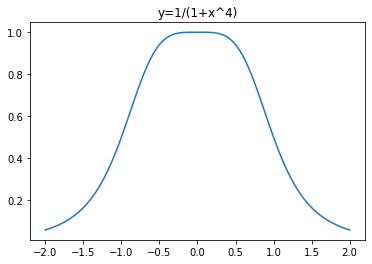

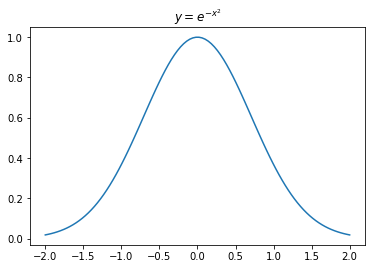

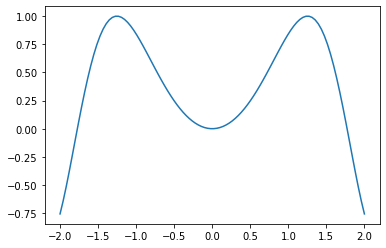

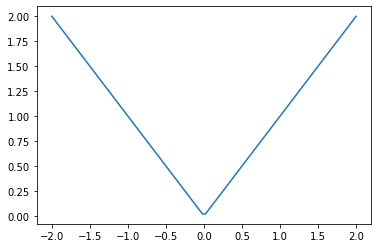

In [ ]:
#graficas
#plt.xkcd()
x=np.linspace(-2,2,100)
plt.plot(x,g(x))
plt.title('y=1/(1+x^4)')
plt.show()
plt.plot(x,gauss(x))
plt.title('$y=e^{-x^2}$')
plt.show()
plt.plot(x,Fresnel(x))
plt.show()
plt.plot(x,absoluto(x))

##Ejemplo 4.
Representar graficamente la suma de Riemann anterior

4.037037037037036

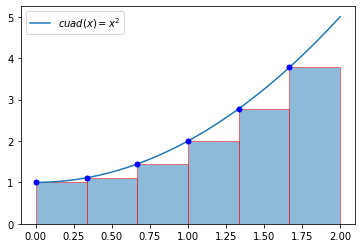

In [ ]:
#@title Suma por izquierda, particion n subintervalos { run: "auto", vertical-output: true }

#Graficamos la función
def cuad(x):
  return x**2+1
X=np.linspace(0,2,100)
Y=cuad(X) 
plt.plot(X,Y) #gráfica f
#graficamos las barras para n subintervalos
a,b,n=0,2,5
n = 50 #@param {type:"slider", min:1, max:100, step:1}
X1=np.linspace(a,b,n+1)[:-1]
Y1=cuad(X1)
delta=(b-a)/n
plt.legend(['$cuad(x)=x^2$']) #titulo gráfica
plt.bar(X1,Y1,width=delta,align='edge',edgecolor='r',alpha=0.5) #grafica barras
plt.plot(X1,Y1,'b.',markersize = 10) # gráfica puntos cuad(c_i) #grafica ptos izquierdos
SumIzq(lambda x:x**2+1,0,2,n)

##Ejercicio 2.
Implemente el codigo anterior en una función que retorne la grafica de la suma de riemann y aplique esta función a las funciones del ejercicio 1.

In [ ]:
#Respuesta problema 2
def GrafSumIzq(f,a,b,n):
  X=np.linspace(a,b,n*10)
  Y=f(X)  
  plt.plot(X,Y)
#graficamos las barras para n subintervalos
  X1=np.linspace(a,b,n+1)[:-1]
  Y1=f(X1)
  delta=(b-a)/n
  plt.legend(['$y=f(x)$'])
  plt.bar(X1,Y1,width=delta,align='edge',edgecolor='b',alpha=0.5)
  plt.plot(X1,Y1,'b.',markersize = 10) # gráfica puntos cuad(c_i)
  plt.show()
  return SumIzq(f,a,b,n) 



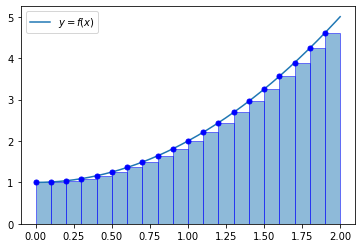

1.30875

In [ ]:
#@title Suma de Riemann de g(x)=1/(1+x^4) { run: "auto", vertical-output: true }
n = 24 #@param {type:"slider", min:1, max:30, step:1}
GrafSumIzq(cuad,0,2,n)


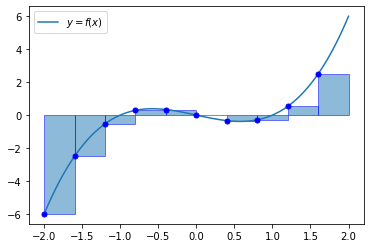

-0.24749999999999997

In [ ]:
def t(x):
  return x**3-x

GrafSumIzq(t,-2,2,10)

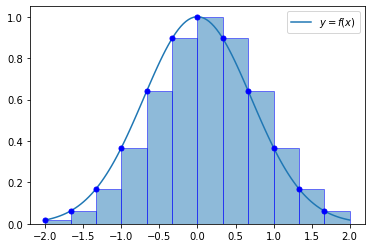

0.7727366045112969

In [ ]:
#@title Gaussiana { run: "auto", vertical-output: true }
n = 12 #@param {type:"slider", min:1, max:20, step:1}


GrafSumIzq(gauss,-2,2,n)


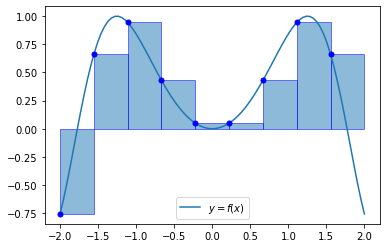

0.26463470476228806

In [ ]:
#@title Fresnel { run: "auto", vertical-output: true }
n = 9 #@param {type:"slider", min:1, max:20, step:1}

GrafSumIzq(Fresnel,-2,2,n)

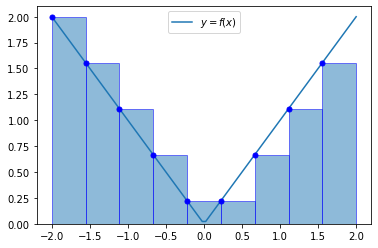

0.4444444444444444

In [ ]:
#@title Valor absoluto { run: "auto", vertical-output: true }
n = 9 #@param {type:"slider", min:1, max:20, step:1}

GrafSumIzq(absoluto,-2,2,n)

##Interactividad usando interact
Si tenemos una función func(n) que depende de n podemos crear un deslizador que recorra los valores de n de max a min de la siguiente forma

```python
interact(func(n),n=slider(min,max))
```
recuerde importar interact y slider del modulo ipywidgets usando:


```python
from ipywidgets import interact
from ipywidgets.widgets import IntSlider as slider
```

veamos el siguiente ejemplo:


In [ ]:
#Deslizador para calcular suma por izquierda con n subintervalos, usamos interact del modulo ipywidgets 
f=cuad
interact(lambda n: SumIzq(f,0,1,n),n=slider(min=1,max=10))

interactive(children=(IntSlider(value=1, description='n', max=10, min=1), Output()), _dom_classes=('widget-int…

<function __main__.<lambda>>

##Implementación sumas por derecha

Esta sección es una implementación similar a la anterior de las sumas de Riemann por la derecha.

In [ ]:

def SumDer(f,a,b,n=10):
  '''Retorna la suma de Riemann por derecha de una función f en el intervalo [a,b] y n subintervalos'''
  PX=np.linspace(a,b,n+1)[1:]
  PY=[f(c) for c in PX]
  Delta = (b-a)/n
  return Delta*np.sum(PY)


In [ ]:
SumDer(cu,0,2,3) #probamos la implementación

4.148148148148148

## Gráficas sumas por derecha

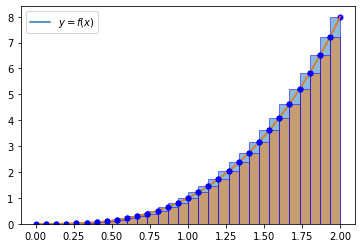

(4.271111111111111, 3.7377777777777776, 4.004444444444444)

In [ ]:
#@title Suma por derecha, particion n subintervalos { run: "auto", vertical-output: true }

#Graficamos la función
def cubic(x):
  return x**3
X=np.linspace(0,2,100)
Y=cubic(X) 
plt.plot(X,Y)
#graficamos las barras para n subintervalos
a,b,n=0,2,5
n = 30 #@param {type:"slider", min:1, max:100, step:1}
X1=np.linspace(a,b,n+1)[1:]
Y1=cubic(X1)
delta=(b-a)/n
plt.legend(['$cuad(x)=x^2$'])
plt.bar(X1,Y1,width=-delta,align='edge',edgecolor='b',alpha=0.5)
plt.plot(X1,Y1,'b.',markersize = 10) # gráfica puntos cuad(c_i)
SD=SumDer(cubic,0,2,n)
SI=SumIzq(cubic,0,2,n)
GrafSumIzq(cubic,0,2,n)
SD,SI,0.5*(SD+SI)

##Ejercicio

Implemente el codigo anterior en una función de forma similar a como se hizo para sumas por izquierda.

## Método del trapecio.

El método del trapecio consiste en aproximar la integral de $f$ en [a,b] usando el promedio de las sumas de Riemann por izquierda y derecha. Más adelante hablaremos de la estimación del error y una implementación más eficiente, de momento implementaremos este método de forma sencilla promediando las funciones anteriores.

In [ ]:
def Trapecio(f,a,b,n=100):
  return 0.5*(SumIzq(f,a,b,n)+SumDer(f,a,b,n))

## Use el método del trapecio para aproximar 
$$\int_{0}^{1} e^{-x^2} \ dx$$

In [ ]:
Trapecio(cu,0,1,1000000)

0.3333333333335002

#Implementacion suma de Riemann general
Implementaremos una función SumRie que toma una función f la partición $x_0 < x_1 \cdots < x_n$  como un arreglo
X=[x_0,...,x_n] y las etiquetas $c_1...c_n$ como otro arreglo C=[c_1,c_2,...,c_n] y nos da la suma
$$f(c_1)(x_1-x_0)+ \cdots +f(c_n)(x_n-x_{n-1})=\sum_{i=1}^{n} f(c_i)\Delta_i$$  
Podemos calcular un arreglo con los 
$\Delta_i=x_{i+1}-x_i$ de una particion X, es decir
 $[\Delta_1,...,\Delta_n]$ con la función de numpy:

```
np.diff(X)
```



In [ ]:
# Implementación

def SumRiem(f,X,C):
  X=np.array(X)
  C=np.array(C)
  FC=[f(c) for c in C]
  DX=np.diff(X)
  return np.dot(DX,FC)



In [ ]:
SumRiem(cu,(0,0.5,0.7,1),(0.2,0.6,0.8))

0.28400000000000003

##Función para graficar una suma de Riemann general

In [ ]:
def GrafSumRiem(f,X,C):
  X=np.array(X)
  C=np.array(C)
  X1=np.linspace(X[0],X[-1],100)
  Y1=[f(x) for x in X1]
  FC=[f(c) for c in C]
  DX=np.diff(X)
  plt.plot(X1,Y1)
  plt.plot(C,FC,'r.')
  plt.bar(X[:-1],FC,width=DX,edgecolor='b',color='y',align='edge',alpha=0.4)
  plt.show()


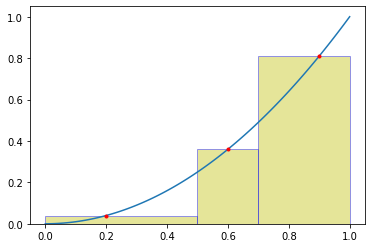

In [ ]:
GrafSumRiem(cu,(0,0.5,0.7,1),(0.2,0.6,0.9))

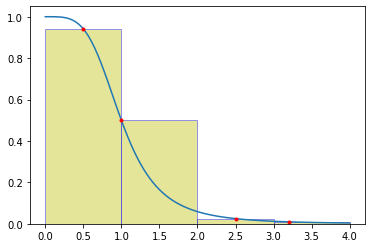

In [ ]:
GrafSumRiem(g,(0,1,2,3,4),(0.5,1,2.5,3.2))

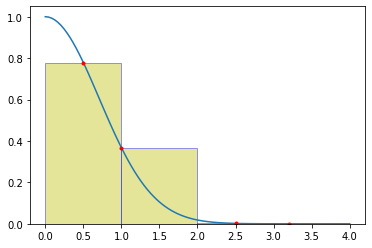

In [ ]:
GrafSumRiem(gauss,(0,1,2,3,4),(0.5,1,2.5,3.2))

##Implementación de sumas de Riemann usando el punto medio

Tomaremos como $c_i$ el punto medio del intervalo $[x_{i-1},x_i]$ y usaremos la implementación de suma de Riemann general.

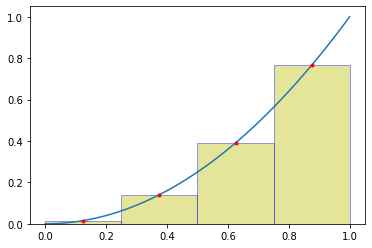

In [ ]:
a,b,n=0,1,4
f=cuad
Delta=(b-a)/n
x0=a+0.5*Delta
PM=[a+(i+0.5)*Delta for i in np.arange(0,n)]
FPM=[f(c) for c in PM]
X=np.linspace(a,b,n+1)
GrafSumRiem(f,X,PM)


In [ ]:
SumDer(gauss,0,1,n=100),SumIzq(gauss,0,1,n=100)

(0.7436573986738272, 0.7499786042621125)

##TALLER EN CLASE - SEMANA 15

##Ejercicio 1: 
Considere la región $R$ que está debajo de la gráfica de $f(x)=x^4+1$ y por encima del intervalo $[0,5]$. Calcule, usando Sumas de Riemann, subestimaciones y sobreestimaciones del área de la región $R$  usando 5, 10, 20, 40, 80, 160 y 320 rectángulos. Despues, calcule una antiderivada de la función y úsela para encontral el valor de la integral $\int_{0}^{5}x^{4}+1 dx$ usando la idea dada en clase respecto al Teorema Fundamental del Cálculo, Finalmente use este último valor para encontrar el error cometido en los cálculos de $S_I$ y $S_D$.  
Puede calcular este error como:   
 
 $$E=|Suma de Riemann - Valor Exacto de la Integral|$$.Consigne los cálculos en la siguiente tablaa.

| n | $S_I$ | $S_D$ | $E_{SI}$ |  $E_{SD}$ |   
|:-:|:-----:|:-----:|:--------:|:---------:|
| 5 |       |       |          |           |                         
| 10|       |       |          |           |                         
| 20|       |       |          |           |                       
| 40|       |       |          |           |                      
| 80|       |       |          |           |                       
|160|       |       |          |           |                      
|320|       |       |          |           |                         

Estudie la columna del error y responda, para cada suma:¿Qué sucede cuando con el error cuando $n$ se duplica?¿Disminuye a la mitad?¿Disminuye a la cuarta parte? Explique

##Ejercicio 2:  
Calcule, por los métodos del trapecio y del punto medio, la aproximación a la integral del ejercicio anterior y consigne la información en dos tablas, una para cada método, semejantes a la anterior ¿Es esta aproximación mejor que cualquiera de las obtenidas en el ejecicio anterior por sumas derechas e izquierdas? explique. ¿Qué sucede con el error en cada uno de los métodos conforme $n$ crece?
 

#Ejercicio 4:

Encuentre un valor aproximado para la integral definida $\int_{0}^{\pi }\sqrt{senx}dx$

El siguiente código sirve para graficar de sumas de Riemann por derecha.

In [ ]:
#Importamos modulos a usar
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact
from ipywidgets.widgets import IntSlider as slider

In [ ]:
#implementamos suma por la izquierda de f en [a,b], en una partición de n subintervalos, como una función:
def SumIzq(f,a,b,n=100):
  PX = np.linspace(a,b,n+1)[:-1] # partición en x, extremos izquierdos.
  PY = [f(c) for c in PX] # evaluación de la partición
  Delta=(b-a)/n 
  return Delta*sum(PY)

In [ ]:
def SumDer(f,a,b,n=10):
  '''Retorna la suma de Riemann por derecha de una función f en el intervalo [a,b] y n subintervalos'''
  PX=np.linspace(a,b,n+1)[1:]
  PY=[f(c) for c in PX]
  Delta = (b-a)/n
  return Delta*np.sum(PY)

In [ ]:
def GrafSumIzq(f,a,b,n):
  X=np.linspace(a,b,n*10)
  Y=f(X)  
  plt.plot(X,Y)
#graficamos las barras para n subintervalos
  X1=np.linspace(a,b,n+1)[:-1]
  Y1=f(X1)
  delta=(b-a)/n
  plt.legend(['$y=f(x)$'])
  plt.bar(X1,Y1,width=delta,align='edge',edgecolor='b',alpha=0.5)
  plt.plot(X1,Y1,'b.',markersize = 10) # gráfica puntos cuad(c_i)
  plt.show()
  return SumIzq(f,a,b,n) 

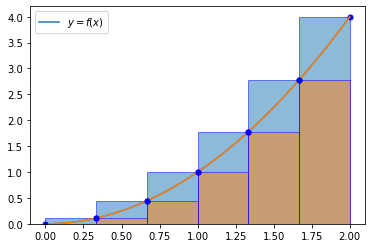

(3.3703703703703702, 2.0370370370370368, 2.7037037037037033)

In [ ]:
 #@title Suma por derecha, particion n subintervalos { run: "auto", vertical-output: true }

#Graficamos la función
def cuad(x):
  return x**2
X=np.linspace(0,2,100)
Y=cuad(X) 
plt.plot(X,Y)
#graficamos las barras para n subintervalos
a,b,n=0,2,6
n = 6 #@param {type:"slider", min:1, max:100, step:1}
X1=np.linspace(a,b,n+1)[1:]
Y1=cuad(X1)
delta=(b-a)/n
plt.legend(['$cuad(x)=x^2$'])
plt.bar(X1,Y1,width=-delta,align='edge',edgecolor='b',alpha=0.5)
plt.plot(X1,Y1,'b.',markersize = 10) # gráfica puntos cuad(c_i)
SD=SumDer(cuad,0,2,n)
SI=SumIzq(cuad,0,2,n)
GrafSumIzq(cuad,0,2,n)
SD,SI,0.5*(SD+SI)

Usemos Punto medio para la función $f(x)=x^2$ en el intervalo $[0,2]$

In [ ]:
def cuadra(x):
  return x**2

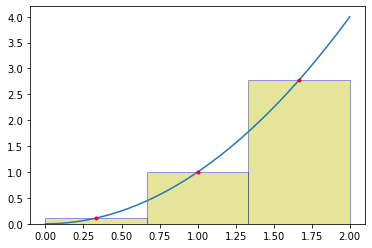

In [ ]:
a,b,n=0,2,3
f=cuadra
Delta=(b-a)/n
x0=a+0.5*Delta
PM=[a+(i+0.5)*Delta for i in np.arange(0,n)]
FPM=[f(c) for c in PM]
X=np.linspace(a,b,n+1)
GrafSumRiem(f,X,PM)

In [ ]:
SumDer(cuadra,0,2,n=3),SumIzq(cuadra,0,2,n=3)

(4.148148148148148, 1.4814814814814814)

In [ ]:
(SumDer(cuadra,0,2,n=3)+SumIzq(cuadra,0,2,n=3))*0.5

2.814814814814815

In [ ]:
def Trapecio(f,a,b,n=100):
  return 0.5*(SumIzq(f,a,b,n)+SumDer(f,a,b,n))

In [ ]:
Trapecio(cuadra,0,2,3)

2.814814814814815

In [ ]:
def SumRiem(f,X,C):
  X=np.array(X)
  C=np.array(C)
  FC=[f(c) for c in C]
  DX=np.diff(X)
  return np.dot(DX,FC)